In [433]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from urllib.request import urlretrieve

In [111]:
weather_df = pd.read_csv('/Users/risharane/Downloads/weatherAUS.csv')

In [112]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Data Cleaning

In [113]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [114]:
# Dropping rows where RainTomorrow = empty
weather_df.dropna(subset = ['RainTomorrow'], inplace = True)

In [115]:
weather_df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [116]:
# Dividing the data into numeric and categorical
numeric_cols = weather_df.select_dtypes(include = np.number).columns.tolist()
categorical_columns = weather_df.select_dtypes(include = 'object').columns.tolist()

# Imputation

In [117]:
from sklearn.impute import SimpleImputer

In [118]:
weather_df[numeric_cols].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

### 1) Imputing Numeric Columns

In [119]:
# Imputing numeric cols
impute = SimpleImputer(strategy = 'mean')

In [120]:
impute.fit(weather_df[numeric_cols])

SimpleImputer()

In [121]:
weather_df[numeric_cols].describe().loc[['mean']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
mean,12.1864,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.84381,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235


In [122]:
impute.statistics_

array([  12.18639973,   23.22678419,    2.34997407,    5.46982422,
          7.62485311,   39.98429166,   14.001988  ,   18.63757586,
         68.84381031,   51.48260609, 1017.65375842, 1015.25820354,
          4.43718939,    4.5031669 ,   16.98750858,   21.68723497])

In [123]:
# Now filling this mean values into empty column
weather_df[numeric_cols] = impute.transform(weather_df[numeric_cols])

In [124]:
weather_df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 2) Imputing Categorical Columns

In [125]:
weather_df[categorical_columns].isna().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [126]:
weather_df[categorical_columns] = weather_df[categorical_columns].fillna('unknown')

In [127]:
weather_df[categorical_columns].isna().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [128]:
weather_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Scaling

### 1) Scaling the numeric columns using Standard scaler

In [129]:
weather_df[numeric_cols].describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4
max,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7


In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler = MinMaxScaler()

In [132]:
scaler.fit(weather_df[numeric_cols])

MinMaxScaler()

In [133]:
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [134]:
scaler.data_max_

array([  33.9,   48.1,  371. ,  145. ,   14.5,  135. ,  130. ,   87. ,
        100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2,   46.7])

In [135]:
# Now we'll do scaling
weather_df[numeric_cols] = scaler.transform(weather_df[numeric_cols])

In [136]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.516509,0.523629,0.001617,0.037723,0.525852,W,0.294574,W,...,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,No,No
1,2008-12-02,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,...,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,No,No
2,2008-12-03,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,...,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,No,No
3,2008-12-04,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,...,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,No,No
4,2008-12-05,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,0.283019,0.502836,0.000000,0.037723,0.525852,E,0.193798,ESE,...,0.59,0.27,0.730579,0.7056,0.493021,0.500352,0.350211,0.504798,No,No
145455,2017-06-21,Uluru,0.266509,0.533081,0.000000,0.037723,0.525852,E,0.193798,SE,...,0.51,0.24,0.728926,0.6912,0.493021,0.500352,0.364979,0.533589,No,No
145456,2017-06-22,Uluru,0.285377,0.568998,0.000000,0.037723,0.525852,NNW,0.124031,SE,...,0.56,0.21,0.710744,0.6720,0.493021,0.500352,0.381857,0.573896,No,No
145457,2017-06-23,Uluru,0.327830,0.599244,0.000000,0.037723,0.525852,N,0.240310,SE,...,0.53,0.24,0.669421,0.6352,0.493021,0.500352,0.415612,0.604607,No,No


### 2) Scaling the categorical columns using OneHotEncoder

In [137]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
weather_categorical = weather_df[categorical_columns].iloc[:,1:-1].columns.tolist()
weather_categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [170]:
weather_df[weather_categorical].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [171]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [172]:
encoder.fit(weather_df[weather_categorical])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [173]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'unknown'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'unknown'], dtype=

In [174]:
encoded_cols = list(encoder.get_feature_names_out(weather_categorical))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [178]:
weather_df[encoded_cols]= encoder.transform(weather_df[weather_categorical])

In [180]:
weather_df[numeric_cols + encoded_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_unknown,RainToday_No,RainToday_Yes,RainToday_unknown
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037723,0.525852,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,0.266509,0.533081,0.000000,0.037723,0.525852,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,0.285377,0.568998,0.000000,0.037723,0.525852,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,0.327830,0.599244,0.000000,0.037723,0.525852,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Train test split

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
inputs = weather_df[numeric_cols + encoded_cols]
target = weather_df['RainTomorrow']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

# $Logistic Regression$

In [207]:
from sklearn.linear_model import LogisticRegression

In [226]:
model = LogisticRegression(solver = 'liblinear')

In [227]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [228]:
model.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [229]:
from sklearn.metrics import accuracy_score

### Accuracy on Testing Set

In [234]:
actual_test = y_test
predicted_test = model.predict(X_test)

In [235]:
accuracy_score(actual_test, predicted_test) * 100

84.6337775589859

### Accuracy on Training Set

In [236]:
actual_train = y_train
predicted_train = model.predict(X_train)

In [237]:
accuracy_score(actual_train, predicted_train) * 100

84.88053167361149

# $Decision Classifier$

In [239]:
weather_df[numeric_cols + encoded_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_unknown,RainToday_No,RainToday_Yes,RainToday_unknown
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037723,0.525852,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,0.266509,0.533081,0.000000,0.037723,0.525852,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,0.285377,0.568998,0.000000,0.037723,0.525852,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,0.327830,0.599244,0.000000,0.037723,0.525852,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [280]:
from sklearn.tree import DecisionTreeClassifier

In [281]:
model = DecisionTreeClassifier(random_state=42)

In [282]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [283]:
y_test

57760     Yes
127128     No
119994     No
7088       No
62992     Yes
         ... 
59458     Yes
73138      No
35876      No
59558      No
44133      No
Name: RainTomorrow, Length: 28439, dtype: object

In [284]:
model.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### 1) Checking on testing data

In [285]:
actual_tree_test = y_test
predicted_tree_test = model.predict(X_test)

In [286]:
# Total yes no in actual data
pd.value_counts(actual_tree_test)

RainTomorrow
No     22098
Yes     6341
Name: count, dtype: int64

In [287]:
# Total yes no in predicted data
pd.value_counts(predicted_tree_test)

No     22016
Yes     6423
Name: count, dtype: int64

In [288]:
# Checking the accuracy score
testScore = accuracy_score(actual_tree_test, predicted_tree_test) * 100
testScore

78.76155982981118

### 2) Checking on Training data

In [323]:
actual_tree_train = y_train
predicted_tree_train = model.predict(X_train)

In [324]:
trainScore = accuracy_score(actual_tree_train, predicted_tree_train)  * 100
trainScore

99.99648364013574

In [325]:
model.predict_proba(X_train)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

As the model is giving the perfect value either 0 or 1 states that the model is damn sure about the output but only for training set i.e the data that it already knows

In [272]:
print(f'Accuracy Score of Training Set : {trainScore}\nAccuracy Score of Test Set : {testScore}')

Accuracy Score of Training Set : 99.99648364013574
Accuracy Score of Test Set : 78.76155982981118


$ Overfitting $ : The phenomena where the the model give best or high accuracy on training set but the accuracy drastically drops when tried on testing set or new data that the model don't know is called as Overfitting.<br> This happens because the model just mimics/memorizes the training set completely due to which it is able to predict the correct output when given training set data input

In [295]:
y_test.value_counts() / len(y_test) * 100

RainTomorrow
No     77.703154
Yes    22.296846
Name: count, dtype: float64

This means if we had the dummy model that simply predicted 'no' then that dummy model would have the accuracy of 77 %. And our model(test set) has an accuracy of 78 % which is only marginally better than the dummy model

## Visualizing the Decision Tree

In [302]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

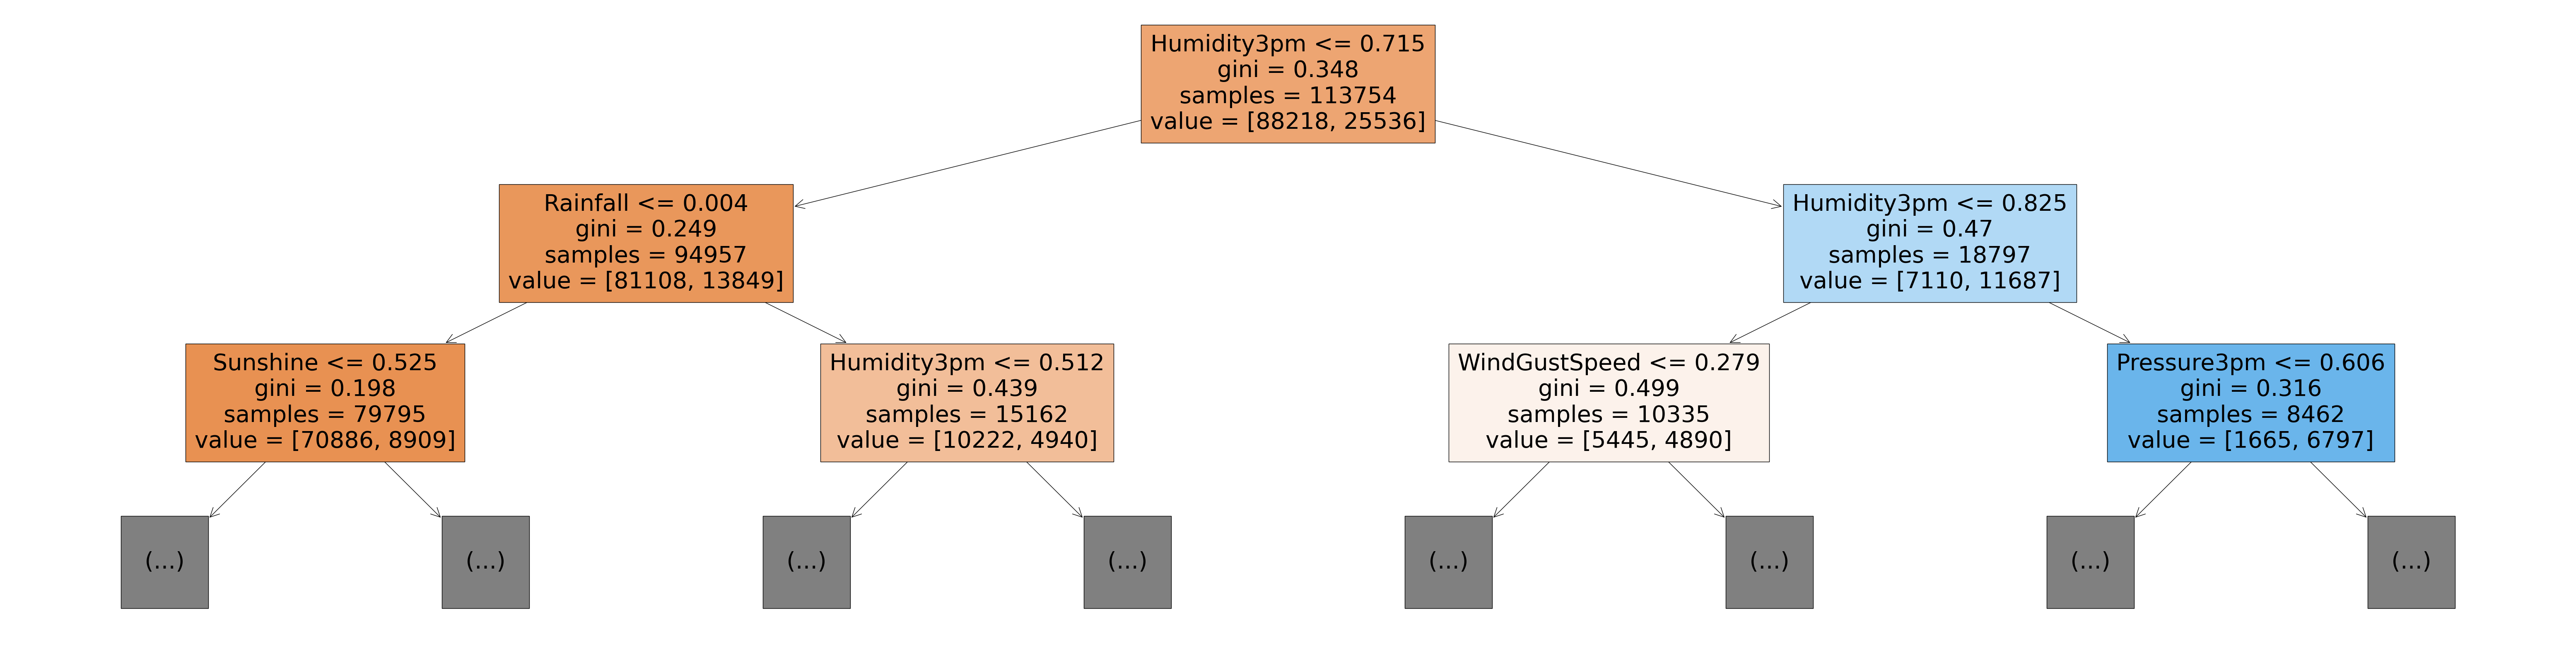

In [306]:
plt.figure(figsize = (80, 20))
plot_tree(model, feature_names = X_train.columns, max_depth=2, filled = True);

$Gini& : This is the loss function used by the decision tree to decide  which columns should be used for spliiting the data and at what point the column should split $<br>
$&A lower Gini index indicates a bettwer split$<br>
A perfect split(only one class on each side) has a Gini index of 0<br>
The leaf nodes will contain the result i.e either 'Yes' or 'No'<br>
Low Gini Score - Good Split<br>
High Gini Score - Bad Split

Humidity3pm is the most important factor that will lead to low Gini Score, hence it is a root/top level node

In [311]:
# Checking the total depth of tree
model.tree_.max_depth

56

In [313]:
from sklearn.tree import export_text

In [320]:
text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.59
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.31
|   |   |   |   |   |   |--- WindGustSpeed <= 0.25
|   |   |   |   |   |   |   |--- Location_Woomera <= 0.50
|   |   |   |   |   |   |   |   |--- Location_Perth <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- Location_Perth >  0.50
|   |   |   |   |   |   |   |   |   |--- MaxTemp <= 0.78
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- MaxTemp >  0.78
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- Location_Woomera >  0.50
|   |   |   |   |   |   |   |   |--- WindGustDir_SSW <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustDir_SSW >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   | 

### Feature Importance of every column

In [322]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_unknown',
       'RainToday_No', 'RainToday_Yes', 'RainToday_unknown'],
      dtype='object', length=119)

In [326]:
model.feature_importances_

array([3.67750455e-02, 3.25379280e-02, 5.92778067e-02, 2.14449477e-02,
       4.55196233e-02, 5.26833606e-02, 2.71150591e-02, 2.98980192e-02,
       3.73639416e-02, 2.59608606e-01, 3.67216434e-02, 6.31833707e-02,
       1.40176930e-02, 1.82944952e-02, 3.68319682e-02, 3.49935259e-02,
       2.29593412e-03, 1.42704971e-03, 1.12131576e-03, 4.43174967e-04,
       1.63056027e-03, 1.17270062e-03, 1.25956364e-03, 1.43020134e-03,
       1.03439848e-03, 1.47311084e-03, 8.71811604e-04, 1.69664017e-03,
       1.75462530e-03, 1.87165497e-04, 1.10116141e-03, 1.26153344e-03,
       4.26350027e-04, 1.31071185e-03, 1.11236418e-03, 1.04163841e-03,
       8.06507220e-04, 1.25896937e-03, 1.26949511e-03, 1.40250109e-03,
       9.92805104e-05, 9.14059696e-04, 2.11191078e-03, 1.40685578e-03,
       1.37189872e-03, 1.27127140e-03, 7.05202502e-04, 1.45665138e-03,
       1.58393139e-03, 2.39878779e-03, 1.34271432e-03, 1.41271044e-03,
       1.24216877e-03, 8.81032141e-04, 1.19343457e-03, 9.33262975e-04,
      

i.e the importance of MinTemp is 3.677, MaxTemp is 3.253, Rainfall is  5.927 etc

In [334]:
importance_df = pd.DataFrame({
    'features' : X_train.columns,
    'importance (in %)' : model.feature_importances_*100
}).sort_values('importance (in %)', ascending = False)
importance_df

,features,importance (in %)
9,Humidity3pm,25.960861
11,Pressure3pm,6.318337
2,Rainfall,5.927781
5,WindGustSpeed,5.268336
4,Sunshine,4.551962
...,...,...
19,Location_AliceSprings,0.044317
32,Location_Katherine,0.042635
57,Location_Uluru,0.027826
29,Location_Darwin,0.018717


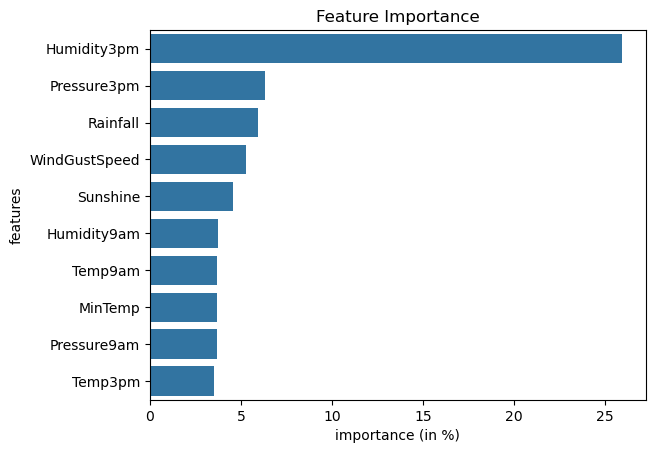

In [340]:
plt.title('Feature Importance');
sns.barplot(data = importance_df.head(10), x = 'importance (in %)', y = 'features');

# Strategies to reduce Overfitting - Regularization

$Parameter$ - Anything that the model figures out or learn on it's own is called as parameter. (Like weights in Logistic Regression, or importance of features in Decision Tree)<br>
$Hyperparameter$ - The parameters or features that we manually tell the model are called as 'Hyperparameters'. (like max_depth)

In [341]:
model.tree_.max_depth

56

In [352]:
# The earlier trained model went upto 56 levels deep. Therefore specifing the max_depth manually
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [353]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [355]:
actual_train = y_train
predicted_train = model.predict(X_train)

In [359]:
trainScore = accuracy_score(actual_train, predicted_train) * 100
trainScore

82.90170015999438

Here our model is giving less accuracy even on training set as compared to prior that gave 99% accuracy, as we specified max_depth = 3, because it hasn't memorized all data but just studies the relation/trends between first few important factors

In [357]:
actual_test = y_test
predicted_test = model.predict(X_test)

In [360]:
testScore = accuracy_score(actual_test, predicted_test) * 100
testScore

82.71387882836949

In [361]:
print(f'Accuracy Score of Training Set : {trainScore}\nAccuracy Score of Test Set : {testScore}')

Accuracy Score of Training Set : 82.90170015999438
Accuracy Score of Test Set : 82.71387882836949


Now we can see that there isn't a lot of difference between the prediction on training data and testing data

In [364]:
model.classes_

array(['No', 'Yes'], dtype=object)

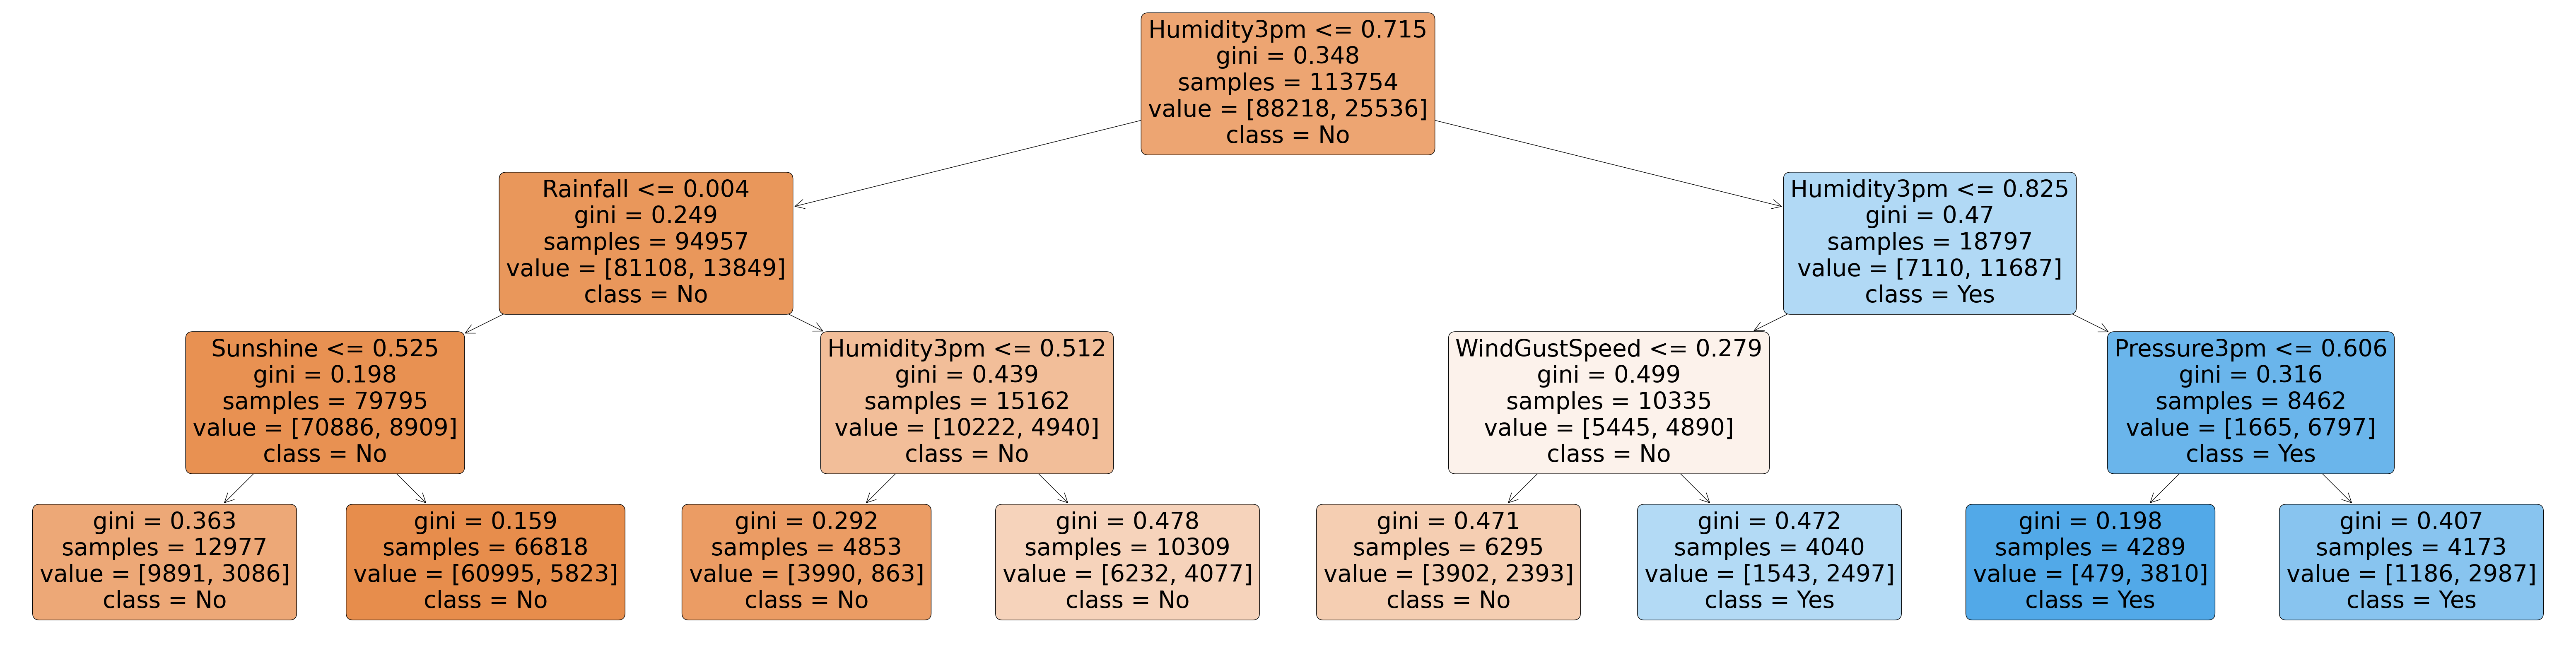

In [363]:
plt.figure(figsize = (80, 20))
plot_tree(model, feature_names=X_train.columns, filled = True, rounded = True, class_names = model.classes_);

In [375]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = (1 - model.score(X_train, y_train)) * 100
    test_error = (1 - model.score(X_test, y_test)) * 100
    return {'Max_Depth' :  md, 'Training_Error' : train_error, 'Test_Error' : test_error}

In [376]:
# List Comprehension
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [377]:
errors_df

,Max_Depth,Training_Error,Test_Error
0,1,18.424847,18.731320
1,2,17.936952,18.028060
2,3,17.098300,17.286121
3,4,16.647327,17.071627
4,5,16.093500,16.396498
5,6,15.806917,16.385949
6,7,15.348032,16.097612
7,8,14.945409,16.164422
8,9,14.405647,16.305074
9,10,13.693584,16.273427


We can see that as we increase the max_depth the the training error decreases and the test error increases

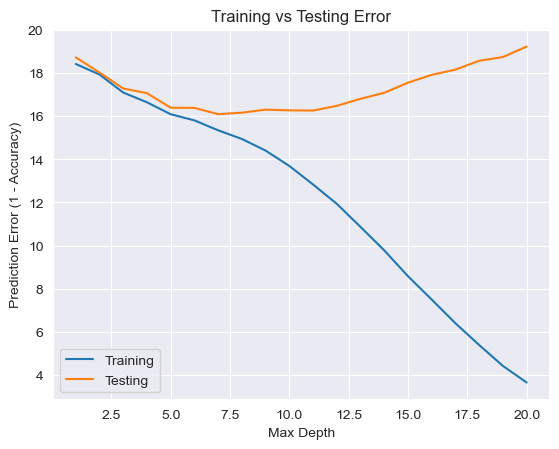

In [384]:
sns.set_style('darkgrid')
plt.title('Training vs Testing Error')
plt.plot(errors_df.Max_Depth, errors_df.Training_Error);
plt.plot(errors_df.Max_Depth, errors_df.Test_Error);
plt.legend(['Training', 'Testing']);
plt.xlabel('Max Depth');
plt.ylabel('Prediction Error (1 - Accuracy)');

With some increase in max_depth the testing error decreases i.e the accuracy of testing set increases. But with some more increase in the max_depth the testing error again increases i.e the accracy of testing set decreases and the accuracy of training set increases. Becore after increasing the max_depth to a higher limit the model again starts memorizing the data due to which the training error decreases and the testing error increases<br> 
$&At max_depth of 7 we can get good testing accuracy but not after 7. Therefore the best fit line will be at 7 $

In [406]:
#Therefore training model at max depth of 7
model = DecisionTreeClassifier(max_depth=7, random_state=42)

In [407]:
model.fit(X_train, y_train);

In [408]:
# Training set accuracy
trainScore = model.score(X_train, y_train) * 100
trainScore

84.65196828243403

In [409]:
# Testing set accuracy
testScore = model.score(X_test, y_test) * 100
testScore

83.90238756637012

In [458]:
print(f'Accuracy Score of Training Set : {trainScore}\nAccuracy Score of Test Set : {testScore}')

Accuracy Score of Training Set : 84.65196828243403
Accuracy Score of Test Set : 83.90238756637012


Therefore we can see that the training and testing accuracy increased with the hyperparameter max_depth being set at 7<br>
$&So changing the value of this hyperparameter to get best results is called as 'Tuning the parameter'$

#### So this process of reducing the overfitting is called as 'Regularization'

In [425]:
# Another hyperparameter
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [426]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [427]:
# training accuracy
model.score(X_train, y_train) * 100

84.69152733090705

In [428]:
# testing accuracy
model.score(X_test, y_test) * 100

83.71954006821618

In [429]:
model.tree_.max_depth

11

# $ Random Forest$

Strategy is to combine the results of several decision trees trained with slightly different hyperparameters on same dataset. This is called as Random State<br>
Each decision tree will make differnt kinds of error and upon averaging them, many of the errors will cancel out. This idea is commonly know as 'wisdom of the crowd'

### 1) Random Forest for Classification - Majority Voting

Here we look at the output from all trees and consider the majority i.e the class/output that occur maximum times and consider that as an output of Random Forest

In [445]:
urlretrieve('https://en.predictivesolutions.pl/uploads/blog/boosting-decision-trees/boosting-decision-trees-algoritm-2.png', 'classification.png');

In [446]:
img = Image.open('classification.png')

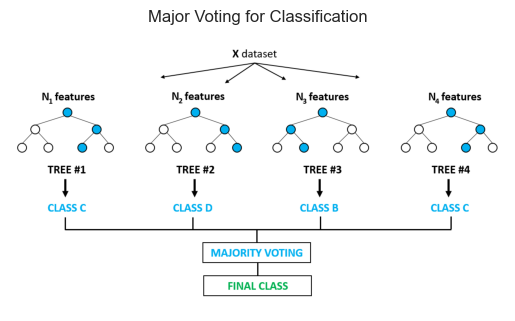

In [448]:
plt.grid(False)
plt.axis('off')
plt.title('Major Voting for Classification')
plt.imshow(img);

Ensemble technique - When you take multiple models and combine the result of all those models to get the final result of this combined model is called as 'Ensemble' technique

In [449]:
from sklearn.ensemble import RandomForestClassifier

In [450]:
model = RandomForestClassifier(n_jobs=1, random_state=42)

'n_jobs' allows the random forest to use multiple parallel workers to train decision trees

In [451]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [459]:
trainScore = model.score(X_train, y_train) * 100
trainScore

99.99120910033933

In [460]:
testScore = model.score(X_test, y_test) * 100
testScore

85.25264601427617

In [461]:
print(f'Accuracy Score of Training Set : {trainScore}\nAccuracy Score of Test Set : {testScore}')

Accuracy Score of Training Set : 99.99120910033933
Accuracy Score of Test Set : 85.25264601427617


Thought training set accuracy is around 100% but the testing set accuracy has increased than the decision tree (that was 78%) and even by the models that we regularised (that was around 84%)

In [463]:
model.predict_proba(X_train) * 100

array([[ 79.,  21.],
       [ 10.,  90.],
       [ 99.,   1.],
       ...,
       [100.,   0.],
       [ 23.,  77.],
       [ 97.,   3.]])

In [464]:
model.predict_proba(X_test) * 100

array([[19., 81.],
       [76., 24.],
       [99.,  1.],
       ...,
       [96.,  4.],
       [97.,  3.],
       [97.,  3.]])

In [465]:
# Checking the length of random forest i.e the total no of decision trees in forest
len(model.estimators_)

100

i.e there are total 100 decision trees in random forest by default

In [474]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

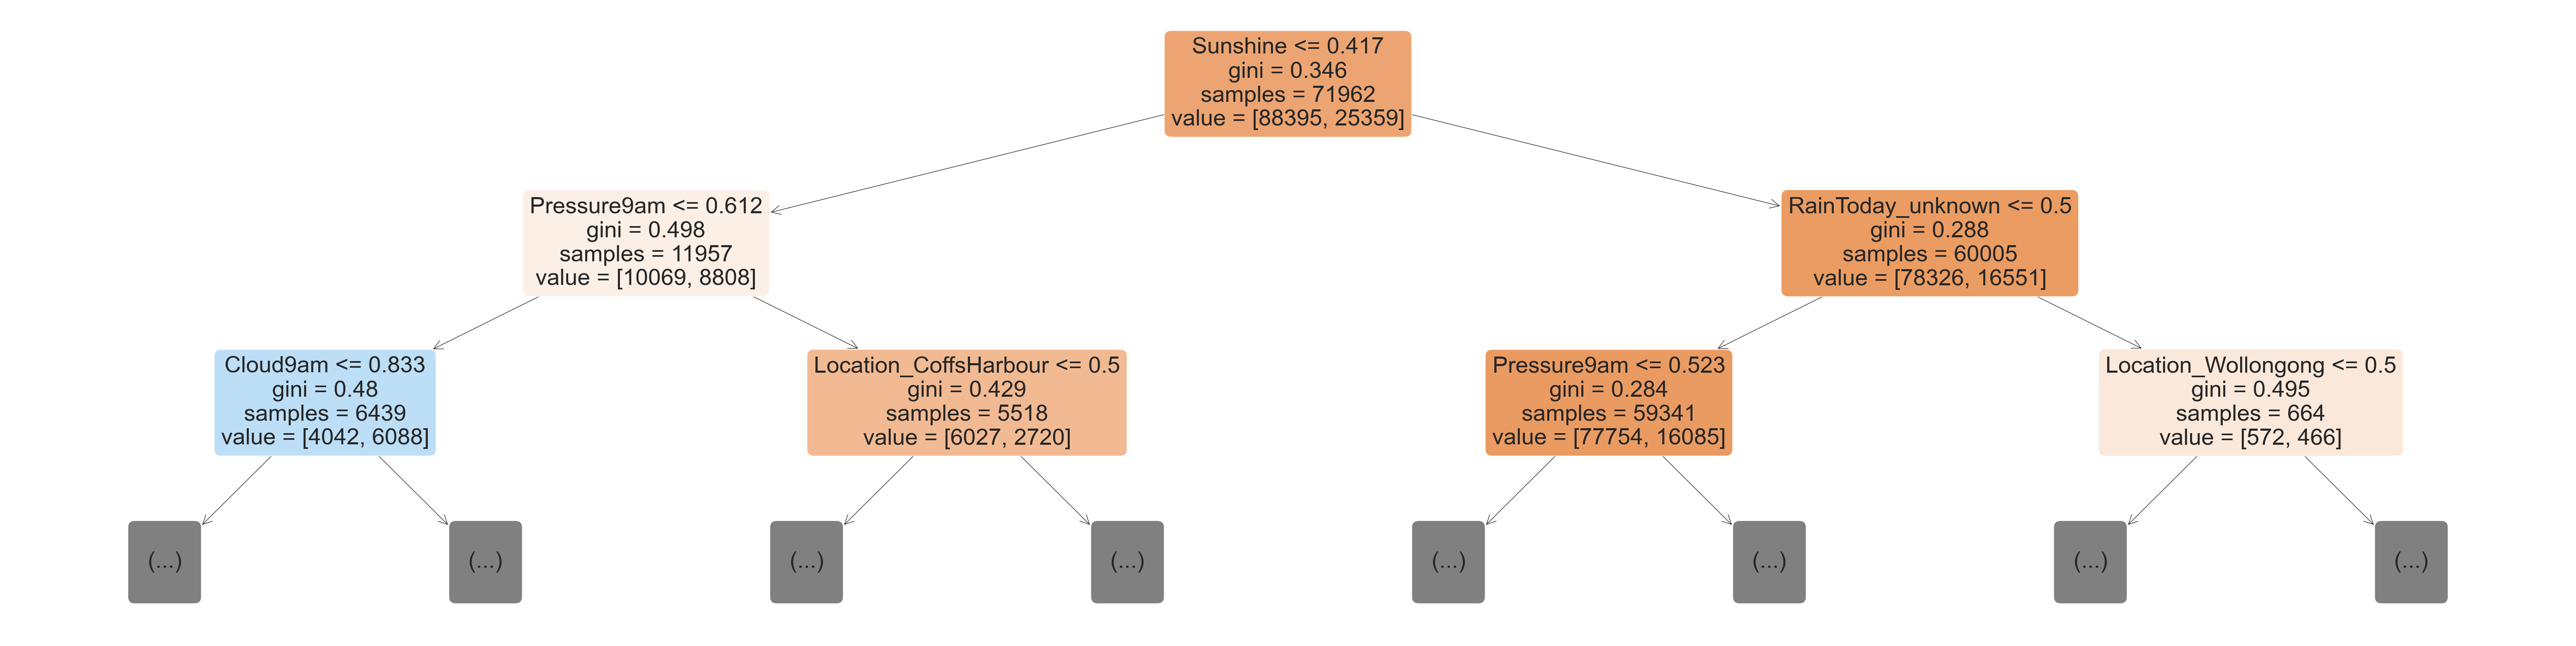

In [479]:
# Plotting 0th decision tree 
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled = True, rounded=True);

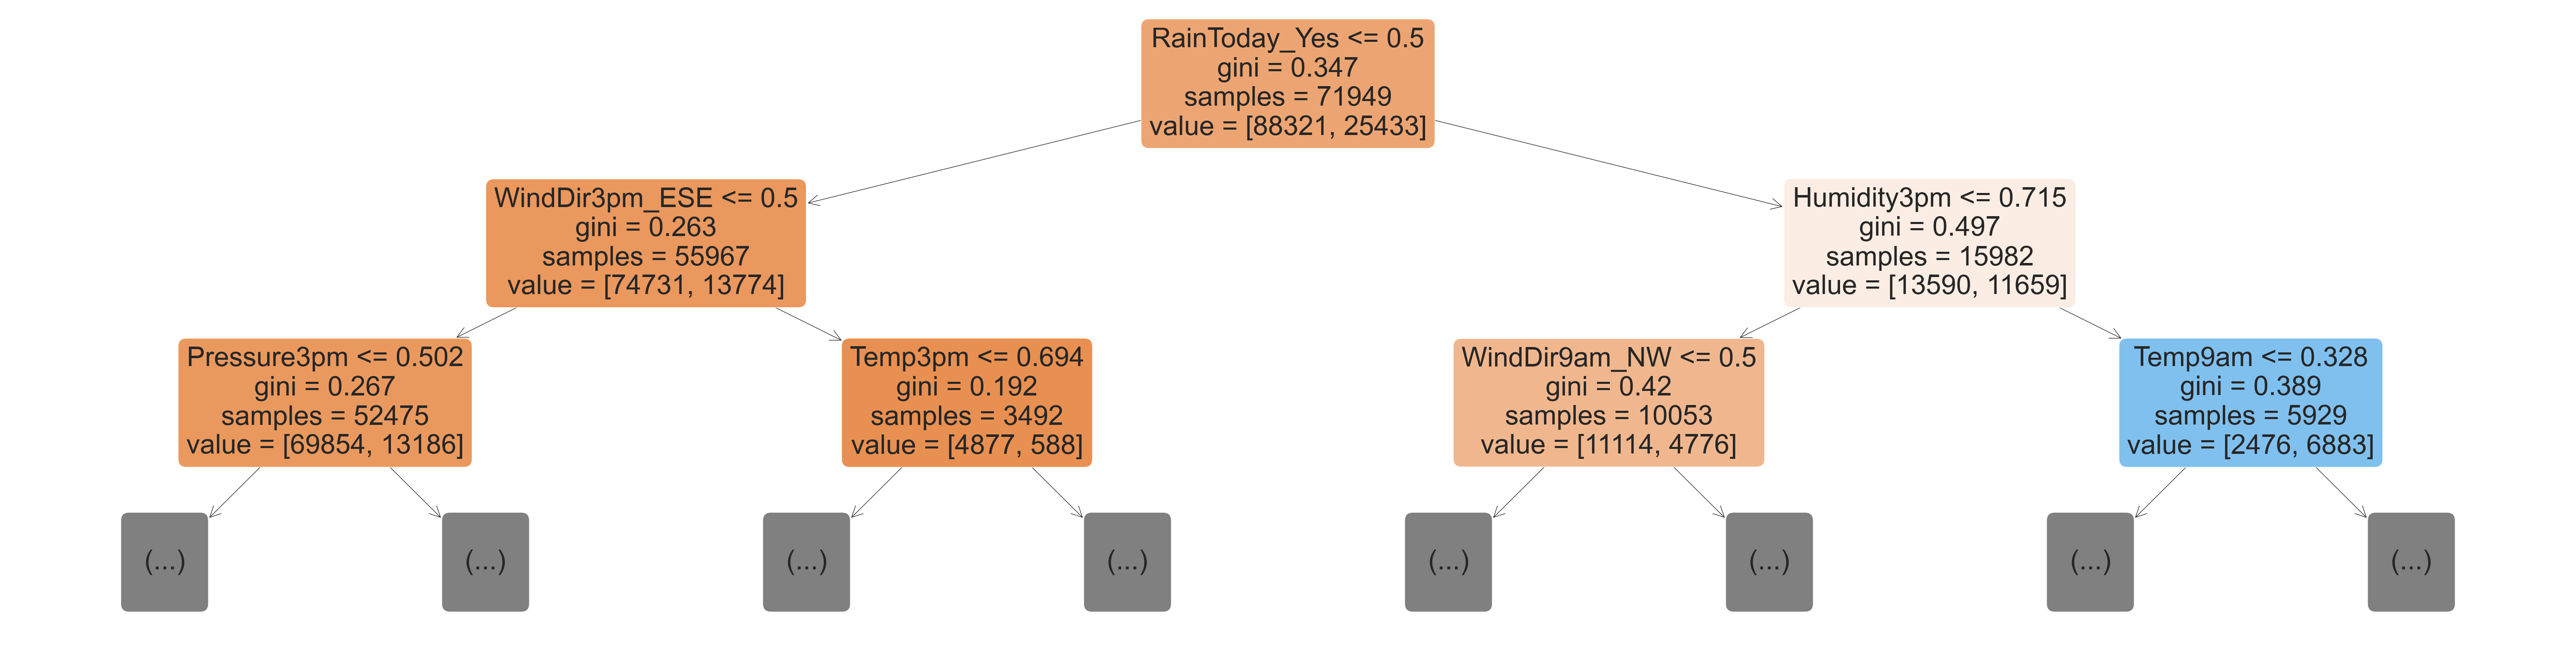

In [480]:
# Plotting 20th decision tree 
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled = True, rounded=True);

# Hyperparameter Tuning with Random Forest

?RandomForestClassifier



In [482]:
base_model = RandomForestClassifier(random_state=42, n_jobs=1)

In [483]:
base_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [485]:
base_train_accuracy = base_model.score(X_train, y_train) * 100
base_train_accuracy

99.99120910033933

In [486]:
base_test_accuracy = base_model.score(X_test, y_test) * 100
base_test_accuracy

85.25264601427617

### 1) n-estimators - The argument controls the number of decision trees in the random forest. (Default value = 100)

As we increase the no. of estimators, we increase the randomness of data<br>
Randomness helps reduce overfitting<br>
randomness is inversely proportional to overfitting

In [495]:
# Helper Function
def estimator_accuracy(n):
    model = RandomForestClassifier(n_jobs=1, n_estimators = n, random_state=42)
    model.fit(X_train, y_train)
    print(f'Accuracy Score of Training Set : {model.score(X_train, y_train) * 100}\nAccuracy Score of Test Set : {model.score(X_test, y_test) * 100}')

In [497]:
#10 estimators
estimator_accuracy(10)

Accuracy Score of Training Set : 98.70422139001705
Accuracy Score of Test Set : 83.9621646330743


In [492]:
#100 estimators
estimator_accuracy(100)

Accuracy Score of Training Set : 99.99120910033933
Accuracy Score of Test Set : 85.25264601427617


In [493]:
#200 estimators
estimator_accuracy(200)

Accuracy Score of Training Set : 99.99648364013574
Accuracy Score of Test Set : 85.2561623123176


In [494]:
#500 estimators
estimator_accuracy(500)

Accuracy Score of Training Set : 99.99648364013574
Accuracy Score of Test Set : 85.417912022223


As we increase the no. of estimators the accracy also increases as the overfitting reduces

But here as we can see the accuracy when used 200 estimators and the accuracy when used 500 estimators have a very slight difference. Therefore don't unnecessarily increase the time and space complexity by using 500 estimators.

### 2) max_depth & max_leaf_modes

In [498]:
# Helper Function
def test_parameters(**params):
    model = RandomForestClassifier(n_jobs=1, random_state=42, **params)
    model.fit(X_train, y_train)
    print(f'Accuracy Score of Training Set : {model.score(X_train, y_train) * 100}\nAccuracy Score of Test Set : {model.score(X_test, y_test) * 100}')

In [499]:
test_parameters(max_depth=5)

Accuracy Score of Training Set : 82.02436837385937
Accuracy Score of Test Set : 81.7398642708956


In [500]:
test_parameters(max_depth=26)

Accuracy Score of Training Set : 97.86908592225329
Accuracy Score of Test Set : 85.2561623123176


In [501]:
test_parameters(max_leaf_nodes=32)

Accuracy Score of Training Set : 82.90170015999438
Accuracy Score of Test Set : 82.41850979289005


In [503]:
test_parameters(max_leaf_nodes=5000)

Accuracy Score of Training Set : 93.11584647572832
Accuracy Score of Test Set : 85.10496149653645


In [508]:
test_parameters(max_depth = 26, n_estimators = 200)

Accuracy Score of Training Set : 97.90073316103171
Accuracy Score of Test Set : 85.29132529273181


### 3) min_samples_split & min_samples_leaf

By default the decision tree tries to split every node that has 2 or more rows.

In [509]:
# Helper Function
def test_parameters(**params):
    model = RandomForestClassifier(n_jobs=1, random_state=42, **params)
    model.fit(X_train, y_train)
    print(f'Accuracy Score of Training Set : {model.score(X_train, y_train) * 100}\nAccuracy Score of Test Set : {model.score(X_test, y_test) * 100}')

In [511]:
# i.e the node will be split only if it has 5 or >5 rows
test_parameters(min_samples_split = 5)

Accuracy Score of Training Set : 98.46862527911107
Accuracy Score of Test Set : 85.41439572418157


In [513]:
# i.e the node will only get split if the nodes child nodes to be formed have atleast 3 rows 
test_parameters(min_samples_leaf = 3)

Accuracy Score of Training Set : 93.12375828542294
Accuracy Score of Test Set : 85.20693413973768


i.e the node will only get split if it has >100 rows. If it has 100 or less than 100 rows then it will not split further and also the node will only split if the child node to be formed has > 60 nodes

In [515]:
test_parameters(min_samples_split = 100, min_samples_leaf = 60)

Accuracy Score of Training Set : 84.91569527225417
Accuracy Score of Test Set : 84.13446323710397


It reduces the power and accuracy of the model as we increase the capacity of nodes

### 4) max_features

Every decision tree in the random forest doesn't consider every feature[columns] from the dataset.<br>
Default max_feature value is sqrt(total_features) i.e evey decision tree in random forest considers 11 differnt feature combinations respectively<br>
As if every tree will consider every feature then it will act as a copies of same tree

max_features :{'auto'} -> default<br> As auto = sqrt(total_features)

In [516]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_unknown',
       'RainToday_No', 'RainToday_Yes', 'RainToday_unknown'],
      dtype='object', length=119)

Here we have total 119 features. Therefore sqrt of 119 will be something around 11.<br> Therefore  every decision tree in this random forest will consider 11 differnt features combination

In [ ]:
# Manually setting max_features

In [517]:
# Helper Function
def test_parameters(**params):
    model = RandomForestClassifier(n_jobs=1, random_state=42, **params)
    model.fit(X_train, y_train)
    print(f'Accuracy Score of Training Set : {model.score(X_train, y_train) * 100}\nAccuracy Score of Test Set : {model.score(X_test, y_test) * 100}')

In [518]:
# i.e each tree will consider only 5 features
test_parameters(max_features = 5)

Accuracy Score of Training Set : 99.99384637023752
Accuracy Score of Test Set : 85.29132529273181


### 5) min_impurity_decrease - Restricting the gini value

In [520]:
# only make split if the gini index is greater than 10 raise to -7
test_parameters(min_impurity_decrease = 1e-7)

Accuracy Score of Training Set : 99.94813369200205
Accuracy Score of Test Set : 85.37220014768452


### 6) bootstrap  & max_samples

Random picking with replacement - you pick a row & then you don't keep track of that and allow youself to pick that row again<br>
This combinations of randomly picked rows is used to train the model is called as bootstrap<br>
Each bootstrap will have different combinations of rows<br>
I.e each decision tree will only be trained on a particular fraction of data<br>
Initially every row has equal weightage, but if a row gets picked twice or thrice then it has higher or double weight assigned

By default bootstrap = True

bootstap = False will allow every decision tree to train on every row of a dataset, where each row will be picked only once

In [524]:
# This is best test accuracy score we have ever achieved till this point
test_parameters(bootstrap = False)

Accuracy Score of Training Set : 99.99648364013574
Accuracy Score of Test Set : 85.54449875171419


$Bagging$ - So this process of picking a bootstrap then training a tree, then again picking another bootstrap and training another tree is called as 'bag of bootstrap' which is commonly known as 'bagging' process

In [525]:
# Setting the max_samples i.e the limit of each bootstrap
test_parameters(max_samples = 0.9)

Accuracy Score of Training Set : 99.97978093078046
Accuracy Score of Test Set : 85.36516755160167


i.e each bootstrap will only have 90% of the data from dataset

### 7) class_weight

In [530]:
# y_train = target
y_train.value_counts() / len(y_train) * 100

RainTomorrow
No     77.551559
Yes    22.448441
Name: count, dtype: float64

i.e the percentage of 'no' is greater than the percentage of 'yes'.<br>
Therefore giving more weightage to the 'yes'

In [531]:
test_parameters(class_weight = {'No' : 1, 'Yes' : 2})

Accuracy Score of Training Set : 99.9947254602036
Accuracy Score of Test Set : 85.40384683005732


In [532]:
test_parameters(class_weight = 'balanced')

Accuracy Score of Training Set : 99.99120910033933
Accuracy Score of Test Set : 85.17528745736489


in this 'balanced' case the scikit-learn will automatically figure out that you have 3 times more 'No's' than yes'es. So it'll apply weight of 3 to other class i.e yes class.<br>
So the inverse ratio is going to get applied as a weight to that other class i.e 'Yes' class

## Combining all the hyper parameters

In [536]:
model = RandomForestClassifier(n_jobs = 1, random_state=42, n_estimators = 300, max_features = 6, max_depth = 10, class_weight={'No' : 1, 'Yes' : 2 })    

In [537]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 2}, max_depth=10,
                       max_features=6, n_estimators=300, n_jobs=1,
                       random_state=42)

In [538]:
print(f'Accuracy Score of Training Set : {model.score(X_train, y_train) * 100}\nAccuracy Score of Test Set : {model.score(X_test, y_test) * 100}')

Accuracy Score of Training Set : 84.42604216115477
Accuracy Score of Test Set : 83.10418791096733
